In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd /content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/

/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets


In [4]:
ls

 adni_24_v1.xlsx            ADNIMERGE.gsheet     df_ohe_corrected.csv
 adni_label_12m_early.csv  'data dictionary'/    df_outlier_rmd.csv
 adni_label_6m_early.csv    df_all_imputed.csv   filtered_adnimerge.csv
 adni_label_v5.csv          df_cleaned.csv       new_points.csv
 adni_label_v6.csv          df_dx_imputed.csv    new_points_log_scaled.csv
 adni_label_wind.csv        df_encoded.csv       new_points_rid_log_scaled.csv
 ADNIMERGE.csv              df_log_scaled.csv


In [5]:
df = pd.read_csv('df_all_imputed.csv')
df.shape

(13427, 44)

In [6]:
df.columns

Index(['level_0', 'index', 'RID', 'COLPROT', 'ORIGPROT', 'VISCODE', 'EXAMDATE',
       'EXAMDATE_bl', 'Years_bl', 'Month_bl', 'Month', 'DX', 'DX_bl',
       'ABETA_bl', 'TAU_bl', 'PTAU_bl', 'AGE', 'PTGENDER', 'PTEDUCAT',
       'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'RAVLT_immediate_bl',
       'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl',
       'MMSE_bl', 'TRABSCOR_bl', 'mPACCdigit_bl', 'mPACCtrailsB_bl', 'FAQ_bl',
       'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'Ventricles_bl',
       'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl',
       'MidTemp_bl', 'ICV_bl', 'FDG_bl'],
      dtype='object')

In [ ]:
help(sns.barplot)

In [ ]:
# Create DataFrame
df = pd.DataFrame(
{'id':[2967, 5335, 13950, 6141, 6169],
    'Player': ['Cedric Hunter', 'Maurice Baker',
               'Ratko Varda' ,'Ryan Bowen' ,'Adrian Caldwell'],
    'Year': [1991, 2004, 2001, 2009, 1997],
    'Age': [27, 25, 22, 34, 31],
    'Tm': ['CHH' ,'VAN' ,'TOT' ,'OKC', 'DAL'],
    'G': [6, 7, 60, 52, 81]})

# Define the sorter
sorter = ['TOT', 'ATL', 'BOS', 'BRK', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL','DEN',
          'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL',
          'MIN', 'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI',
          'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'VAN',
          'WAS', 'WSB']

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))

# Generate a rank column that will be used to sort
# the dataframe numerically
df['Tm_Rank'] = df['Tm'].map(sorterIndex)
df

,id,Player,Year,Age,Tm,G,Tm_Rank
0,2967,Cedric Hunter,1991,27,CHH,6,5
1,5335,Maurice Baker,2004,25,VAN,7,35
2,13950,Ratko Varda,2001,22,TOT,60,0
3,6141,Ryan Bowen,2009,34,OKC,52,25
4,6169,Adrian Caldwell,1997,31,DAL,81,8


In [7]:
def groupby_plot_sort(groupby_c, value_c, sorter, title):

  data = df.groupby(groupby_c)[value_c].nunique().reset_index()
  # Create the dictionary that defines the order for sorting

  sorterIndex = dict(zip(sorter, range(len(sorter))))

  # Generate a rank column that will be used to sort
  # the dataframe numerically
  data['Rank'] =data[groupby_c].map(sorterIndex)

  data.sort_values(by = 'Rank', inplace = True)

  g = sns.barplot(x = groupby_c,y = value_c , data = data)
  for index, row in data.iterrows():
      g.text(row['Rank'], row[value_c], round(row[value_c],2), color='black', ha="center")
  plt.title(title)
  plt.show()



In [8]:
def groupby_plot(groupby_c, value_c,  title):

  data = df.groupby(groupby_c)[value_c].nunique().reset_index()
  
  g = sns.barplot(x = groupby_c,y = value_c , data = data)
  for index, row in data.iterrows():
      g.text(row.name, row[value_c], round(row[value_c],2), color='black', ha="center")
  plt.title(title)
  plt.show()

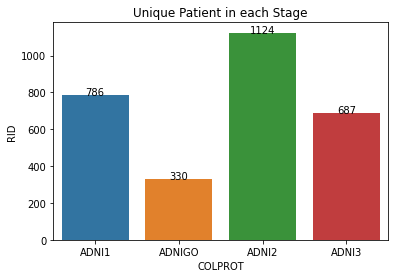

In [13]:

groupby_plot_sort('COLPROT', 'RID', ['ADNI1','ADNIGO','ADNI2','ADNI3' ],"Unique Patient in each Stage")

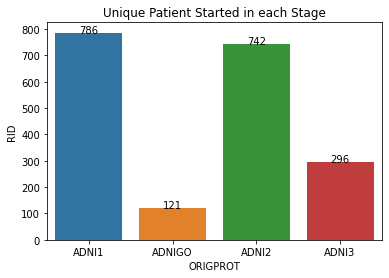

In [17]:

groupby_plot_sort('ORIGPROT', 'RID', ['ADNI1','ADNIGO','ADNI2','ADNI3'], "Unique Patient Started in each Stage")

In [14]:
df

,level_0,index,RID,COLPROT,ORIGPROT,VISCODE,EXAMDATE,EXAMDATE_bl,Years_bl,Month_bl,Month,DX,DX_bl,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl
0,0.0,0.0,2,ADNI1,ADNI1,bl,2005-09-08,2005-09-08,0.000000,0.00000,0.0,CN,CN,685.500000,187.100000,17.340000,74.3,Male,16.0,Not Hisp/Latino,White,Married,0.0,44.0,4.0,6.0,54.5455,28.0,112.0,-4.39437,-4.204620,0.0,0.0,10.67,18.67,5.0,118233.000000,8336.000000,1.229740e+06,4177.000000,16559.000000,27936.000000,1.984660e+06,1.366650
1,1.0,5109.0,2,ADNI1,ADNI1,m06,2006-03-06,2005-09-08,0.490075,5.86885,6.0,CN,CN,1274.000000,304.700000,28.470000,74.3,Male,16.0,Not Hisp/Latino,White,Married,0.0,44.0,4.0,6.0,54.5455,28.0,112.0,-4.39437,-4.204620,0.0,0.0,10.67,18.67,5.0,118233.000000,8336.000000,1.229740e+06,4177.000000,16559.000000,27936.000000,1.984660e+06,1.366650
2,2.0,5110.0,2,ADNI1,ADNI1,m36,2008-08-27,2005-09-08,2.967830,35.54100,36.0,CN,CN,1274.000000,304.700000,28.470000,74.3,Male,16.0,Not Hisp/Latino,White,Married,0.0,44.0,4.0,6.0,54.5455,28.0,112.0,-4.39437,-4.204620,0.0,0.0,10.67,18.67,5.0,118233.000000,8336.000000,1.229740e+06,4177.000000,16559.000000,27936.000000,1.984660e+06,1.366650
3,3.0,5111.0,2,ADNIGO,ADNI1,m60,2010-09-22,2005-09-08,5.037650,60.32790,60.0,CN,CN,1274.000000,304.700000,28.470000,74.3,Male,16.0,Not Hisp/Latino,White,Married,0.0,44.0,4.0,6.0,54.5455,28.0,112.0,-4.39437,-4.204620,0.0,0.0,10.67,18.67,5.0,118233.000000,8336.000000,1.229740e+06,4177.000000,16559.000000,27936.000000,1.984660e+06,1.366650
4,4.0,5112.0,2,ADNIGO,ADNI1,m66,2011-03-04,2005-09-08,5.483920,65.67210,66.0,CN,CN,1274.000000,304.700000,28.470000,74.3,Male,16.0,Not Hisp/Latino,White,Married,0.0,44.0,4.0,6.0,54.5455,28.0,112.0,-4.39437,-4.204620,0.0,0.0,10.67,18.67,5.0,118233.000000,8336.000000,1.229740e+06,4177.000000,16559.000000,27936.000000,1.984660e+06,1.366650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13422,13422.0,15067.0,6828,ADNI3,ADNI3,m12,2020-12-11,2019-10-31,1.114310,13.34430,12.0,Dementia,AD,1136.033333,298.133333,29.556667,81.3,Male,12.0,Not Hisp/Latino,White,Married,1.0,23.0,1.0,1.0,20.0000,24.0,112.0,-11.82250,-9.828630,4.0,1.5,16.33,24.33,7.0,23945.000000,6998.333333,1.021867e+06,4101.666667,18499.000000,19975.000000,1.405967e+06,1.237160
13423,13423.0,14454.0,6830,ADNI3,ADNI3,bl,2019-11-07,2019-11-07,0.000000,0.00000,0.0,MCI,LMCI,1442.766667,325.300000,29.856667,90.0,Male,16.0,Not Hisp/Latino,White,Married,1.0,34.0,6.0,4.0,40.0000,29.0,123.0,-4.30847,-4.414910,1.0,1.0,11.33,17.33,5.0,28164.666667,7402.666667,1.019344e+06,3909.000000,19315.000000,20117.000000,1.372247e+06,1.137933
13424,13424.0,14980.0,6830,ADNI3,ADNI3,m12,2020-10-28,2019-11-07,0.974675,11.67210,12.0,MCI,LMCI,1136.033333,298.133333,29.556667,90.0,Male,16.0,Not Hisp/Latino,White,Married,0.0,34.0,6.0,4.0,40.0000,29.0,123.0,-4.30847,-4.414910,1.0,1.0,11.33,17.33,5.0,23945.000000,6998.333333,1.021867e+06,4101.666667,18499.000000,19975.000000,1.405967e+06,1.286153
13425,13425.0,14575.0,6845,ADNI3,ADNI3,bl,2020-01-22,2020-01-22,0.000000,0.00000,0.0,MCI,LMCI,1069.866667,319.866667,29.966667,62.4,Female,16.0,Not Hisp/Latino,White,Married,0.0,59.0,11.0,0.0,0.0000,30.0,67.0,-0.94713,-0.459318,2.0,2.5,4.67,5.67,0.0,17210.000000,7441.000000,1.016217e+06,4025.333333,18637.666667,19098.666667,1.326777e+06,1.341803


In [15]:
# help(sns.barplot)

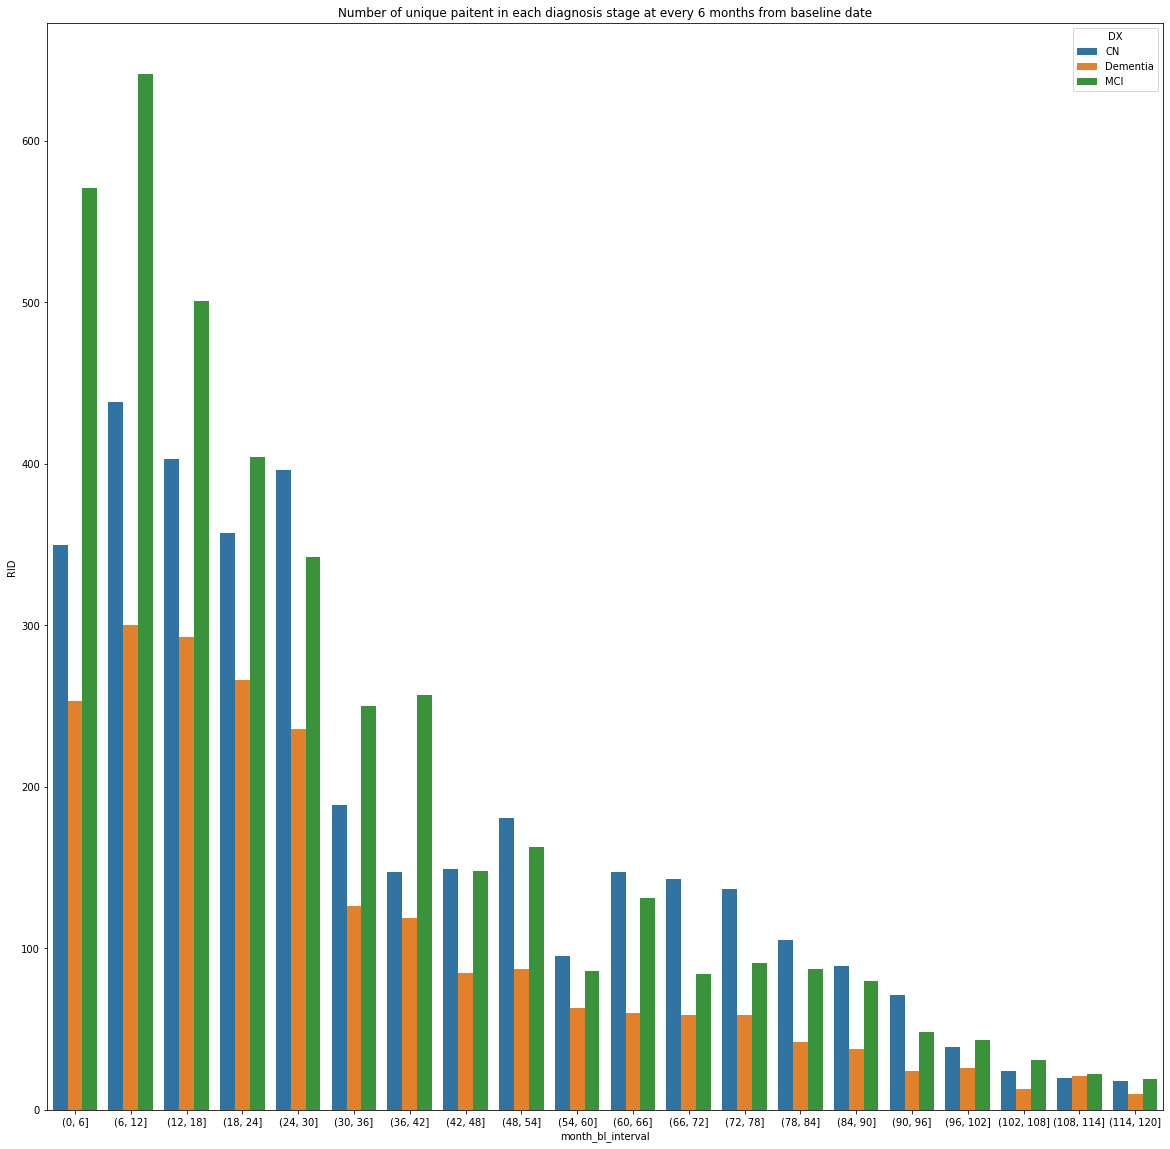

<Figure size 2160x2160 with 0 Axes>

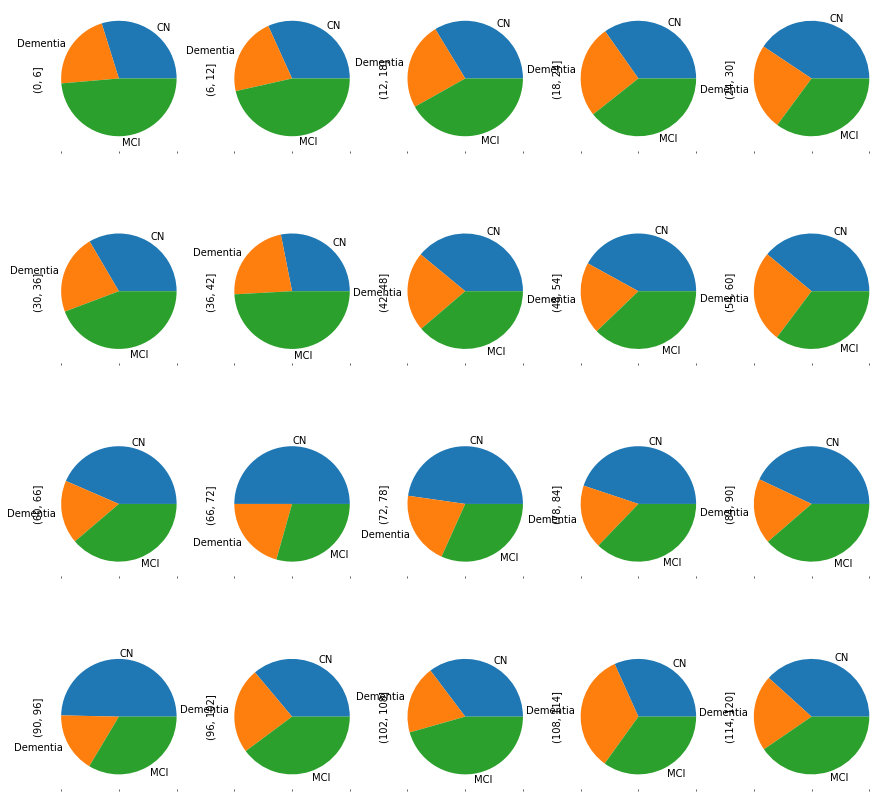

In [16]:
df['month_bl_interval'] = pd.cut(df['Month_bl'],bins = list(range(0,6*(20+1),6)))

data = df.groupby(['month_bl_interval','DX'])['RID'].nunique().reset_index()
plt.figure(figsize= (20,20))
g = sns.barplot(x = 'month_bl_interval',y = 'RID' , data = data, hue = 'DX', dodge = True )

plt.title('Number of unique paitent in each diagnosis stage at every 6 months from baseline date')
plt.show()

plt.figure(figsize= (30,30))
data.pivot_table(values = 'RID',index = 'month_bl_interval',columns = 'DX').T.plot.pie(subplots=True, figsize=(15,15),layout=(4,5),legend = False)
plt.show()

In [ ]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

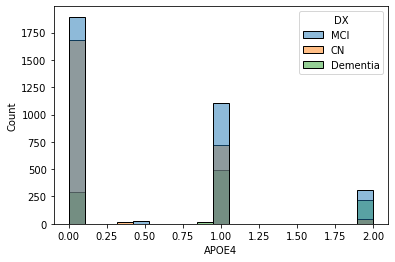

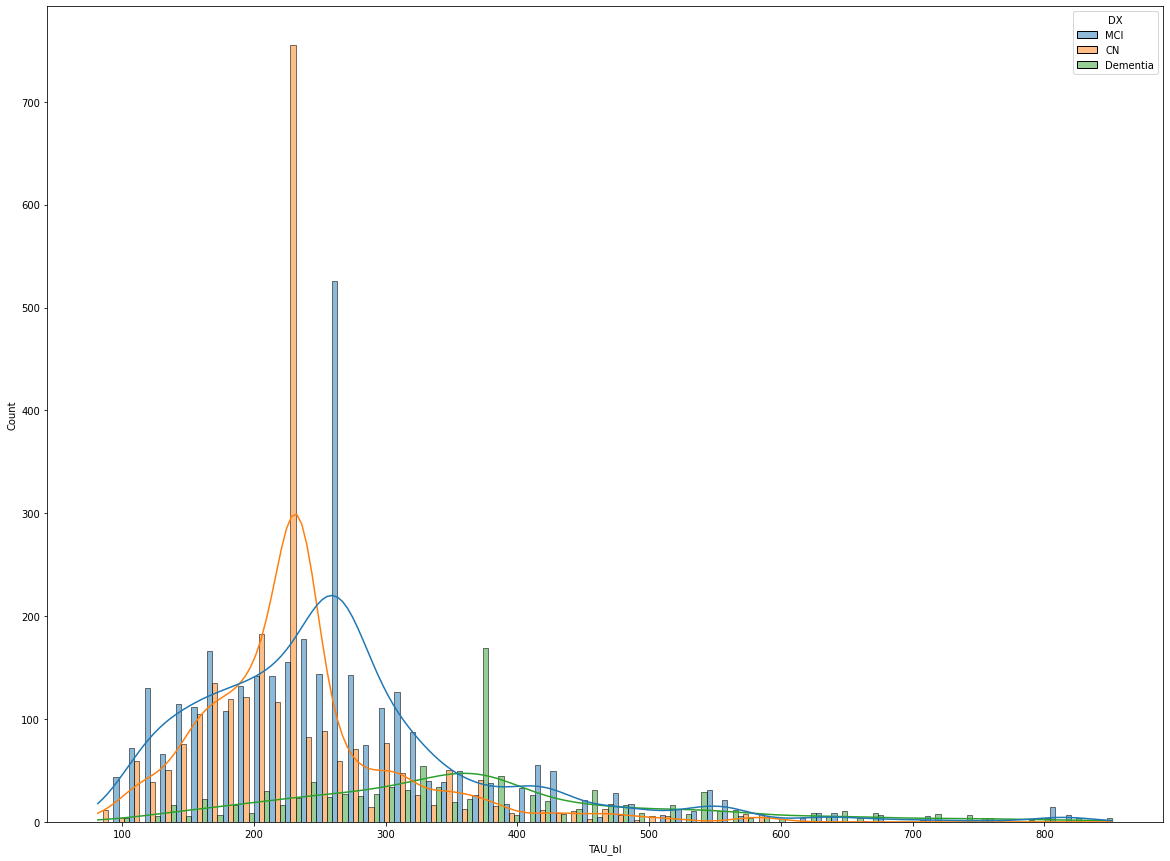

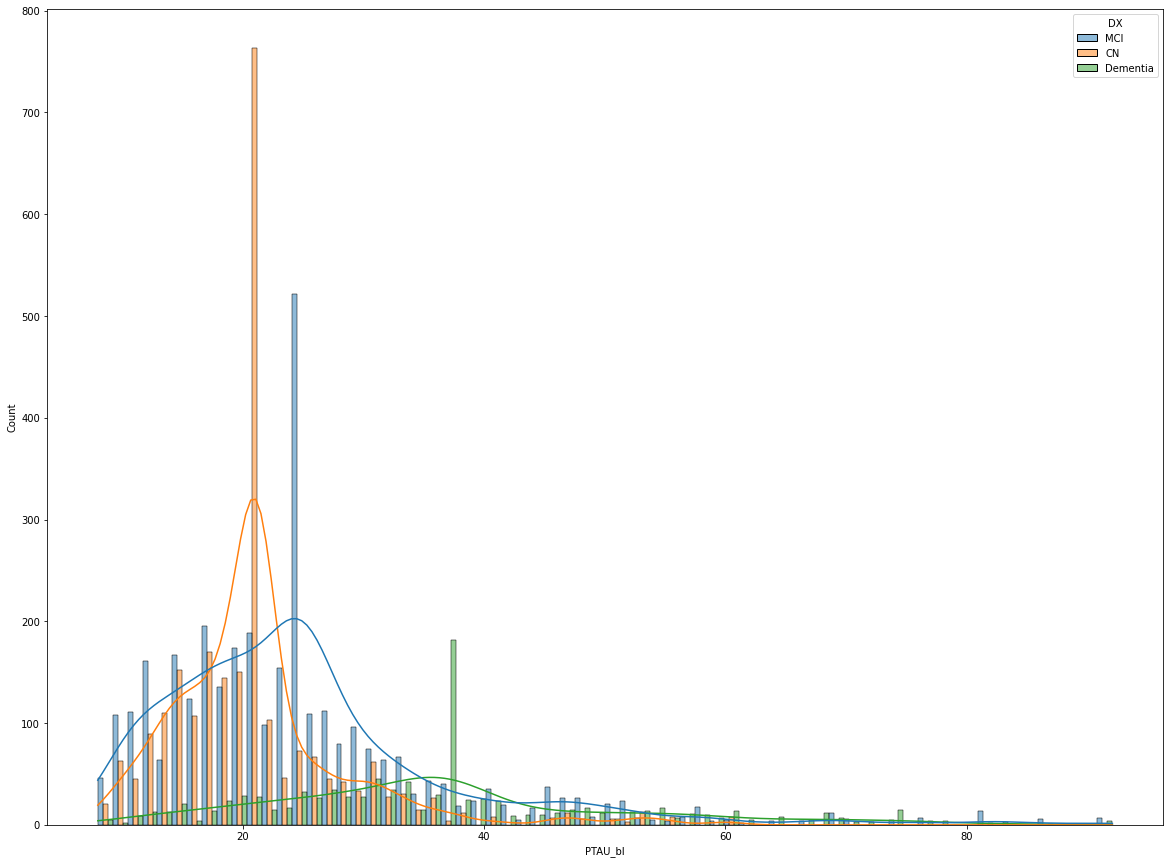

In [ ]:



g = sns.histplot(x = 'APOE4' , data = df, hue = 'DX' )

plt.show()

plt.figure(figsize= (20,15))
g = sns.histplot(x = 'TAU_bl' , data = df, hue = 'DX',multiple="dodge", kde = True )

plt.show()

plt.figure(figsize= (20,15))
g = sns.histplot(x = 'PTAU_bl' , data = df, hue = 'DX',multiple="dodge", kde = True )

plt.show()


In [ ]:
df.columns

Index(['RID', 'VISCODE', 'COLPROT', 'ORIGPROT', 'EXAMDATE', 'DX_bl', 'AGE',
       'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4',
       'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting',
       'LDELTOTAL', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'DX', 'mPACCdigit',
       'mPACCtrailsB', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl',
       'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL',
       'TRABSCOR_bl', 'FAQ_bl', 'mPACCdigit_bl', 'mPACCtrailsB_bl',
       'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
       'Fusiform_bl', 'MidTemp_bl', 'ICV_b

In [ ]:


plt.figure(figsize= (20,15))
g = sns.histplot(x = 'Ventricles' , data = df, hue = 'DX',multiple="dodge", kde = True )

plt.show()

for i in ['FLDSTRENG','Ventricles','Hippocampus','WholeBrain','Entorhinal','Fusiform','MidTemp','ICV']:
  a(i)


ValueError: ignored

<Figure size 1440x1080 with 0 Axes>

In [ ]:
for col in df.columns.to_list():
    sns.histplot(df[col])
    plt.show()

In [ ]:
df.groupby('DX_bl')['AGE']